In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

In [1]:
## https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv
import pandas as pd
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
df = pd.read_csv(url)

In [3]:
df.location.unique()

array(['Chile', 'Czechia', 'Germany', 'Iceland', 'Italy', 'Latvia',
       'Lithuania', 'Romania', 'United States'], dtype=object)

In [4]:
df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [10]:
df['month']=df.date.apply(lambda x: x[0:7])

In [11]:
df

,location,date,vaccine,total_vaccinations,month
0,Chile,2020-12-24,Pfizer/BioNTech,420,2020-12
1,Chile,2020-12-25,Pfizer/BioNTech,5198,2020-12
2,Chile,2020-12-26,Pfizer/BioNTech,8338,2020-12
3,Chile,2020-12-27,Pfizer/BioNTech,8649,2020-12
4,Chile,2020-12-28,Pfizer/BioNTech,8649,2020-12
...,...,...,...,...,...
1627,United States,2021-03-16,Moderna,53647312,2021-03
1628,United States,2021-03-16,Pfizer/BioNTech,55393141,2021-03
1629,United States,2021-03-17,Johnson&Johnson,1766131,2021-03
1630,United States,2021-03-17,Moderna,54643195,2021-03


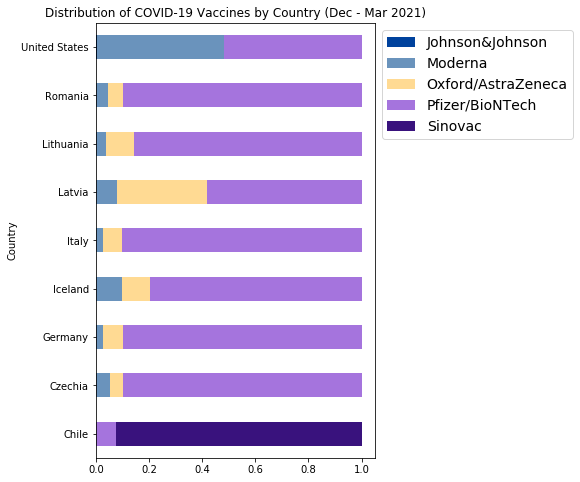

In [212]:
(df[-(df.month.isin(['2020-12']))] \
    .groupby(['location','vaccine'])\
    .sum().unstack('vaccine').sort_index(ascending=True)\
    .apply(lambda x: x/np.nansum(x), axis=1).fillna(0))['total_vaccinations']\
    .plot(kind='barh',figsize=(5,8),stacked=True, color=['#00429d', '#6a93bc', '#ffda93', '#a574dd', '#39127d'])

plt.ylabel('Country');
plt.legend(bbox_to_anchor=(1, 1), fontsize=14);

plt.title('Distribution of COVID-19 Vaccines by Country (Dec - Mar 2021)');

fig1 = plt.gcf()
fig1.savefig('Desktop/plot1.png', dpi=200, bbox_inches='tight')

In [162]:
df.month.value_counts()

2021-02    646
2021-01    514
2021-03    407
2020-12     65
Name: month, dtype: int64

In [148]:
pct_total = df[-(df.month.isin(['2020-12']))] \
    .groupby(['location','month','vaccine'])\
    .sum().unstack('vaccine').sort_index(0, ascending=False)\
    .apply(lambda x: x/np.nansum(x), axis=1).fillna(0)

In [149]:
pct_total

total_vaccinations                               \
vaccine                  Johnson&Johnson   Moderna Oxford/AstraZeneca   
location      month                                                     
United States 2021-03           0.006049  0.487165       0.000000e+00   
              2021-02           0.000000  0.480865       0.000000e+00   
              2021-01           0.000000  0.444280       0.000000e+00   
Romania       2021-03           0.000000  0.056783       1.016921e-01   
              2021-02           0.000000  0.044146       2.878109e-02   
              2021-01           0.000000  0.000000       0.000000e+00   
Lithuania     2021-03           0.000000  0.051310       1.706486e-01   
              2021-02           0.000000  0.030897       6.259060e-02   
              2021-01           0.000000  0.008125       0.000000e+00   
Latvia        2021-03           0.000000  0.100883       5.590028e-01   
              2021-02           0.000000  0.072992       2.003293e-01   
              2021-01           0.000000  0.024867       0.000000e+00   
Italy         2021-03           0.000000  0.037862       1.379597e-01   
              2021-02           0.000000  0.020644       2.418927e-02   
              2021-01           0.000000  0.006364       9.338180e-08   
Iceland       2021-03           0.000000  0.089979       1.834987e-01   
              2021-02           0.000000  0.111165       7.301959e-02   
              2021-01           0.000000  0.081723       0.000000e+00   
Germany       2021-03           0.000000  0.032195       1.414892e-01   
              2021-02           0.000000  0.023358       2.864191e-02   
              2021-01           0.000000  0.010431       0.000000e+00   
Czechia       2021-03           0.000000  0.067779       9.681120e-02   
              2021-02           0.000000  0.048414       1.381183e-02   
              2021-01           0.000000  0.021176       0.000000e+00   
Chile         2021-03           0.000000  0.000000       0.000000e+00   
              2021-02           0.000000  0.000000       0.000000e+00   
              2021-01           0.000000  0.000000       0.000000e+00   

                                                 
vaccine               Pfizer/BioNTech   Sinovac  
location      month                              
United States 2021-03        0.506786  0.000000  
              2021-02        0.519135  0.000000  
              2021-01        0.555720  0.000000  
Romania       2021-03        0.841525  0.000000  
              2021-02        0.927073  0.000000  
              2021-01        1.000000  0.000000  
Lithuania     2021-03        0.778041  0.000000  
              2021-02        0.906513  0.000000  
              2021-01        0.991875  0.000000  
Latvia        2021-03        0.340114  0.000000  
              2021-02        0.726679  0.000000  
              2021-01        0.975133  0.000000  
Italy         2021-03        0.824178  0.000000  
              2021-02        0.955167  0.000000  
              2021-01        0.993636  0.000000  
Iceland       2021-03        0.726522  0.000000  
              2021-02        0.815816  0.000000  
              2021-01        0.918277  0.000000  
Germany       2021-03        0.826315  0.000000  
              2021-02        0.948000  0.000000  
              2021-01        0.989569  0.000000  
Czechia       2021-03        0.835410  0.000000  
              2021-02        0.937774  0.000000  
              2021-01        0.978824  0.000000  
Chile         2021-03        0.073742  0.926258  
              2021-02        0.062506  0.937494  
              2021-01        1.000000  0.000000

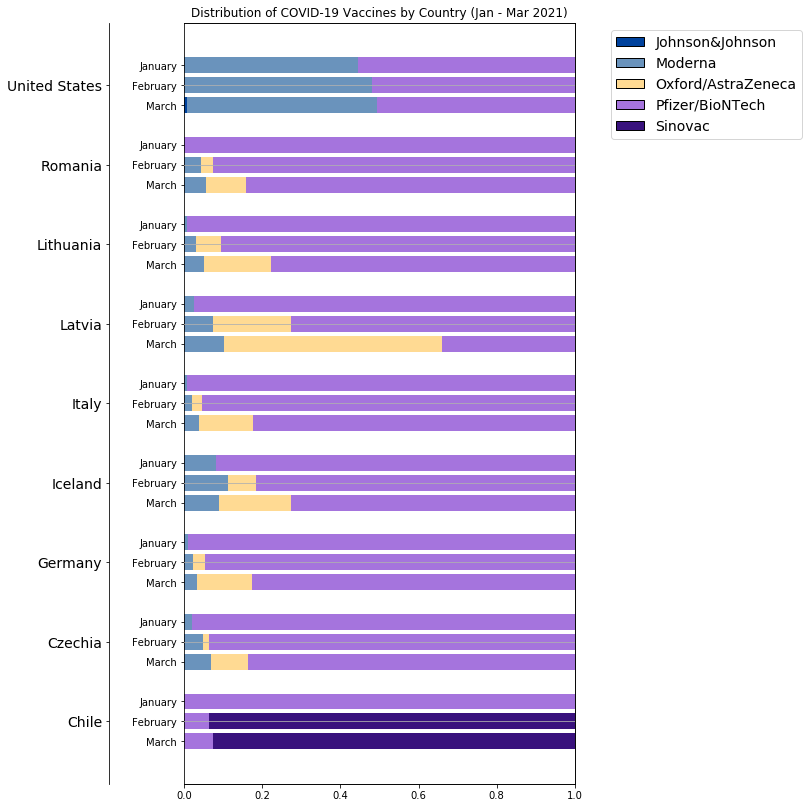

In [213]:
colors = ['#00429d', '#6a93bc', '#ffda93', '#a574dd', '#39127d']

legend_labels = pct_total['total_vaccinations'].columns
inner_axis_labels = ['January','February','March'][::-1]
inner_tick_pos = len(df.location.unique())*2

plt.figure(figsize=(7,14))

for (c,n) in zip(df.location.unique(),range(0,len(df.location.unique()))):
  
  for (b,y) in zip(pct_total.loc[c].index,range(0,len(pct_total.index))):
    for i in range(0,len(pct_total.loc[c].columns)):
      h = pct_total.loc[(c,b)][i]

      if i == 0:
        l = 0
        plt.barh([y*0.5 + 2*n], [h], height = 0.4, left = [i], color=colors[i])
      else:
        l = l + pct_total.loc[(c,b)][i-1]
        plt.barh([y*0.5 + 2*n], [h], height = 0.4, left = [l], color=colors[i])

ax = plt.gca()
ax.set_yticks(sorted([x for x in range(0,inner_tick_pos)] + [x+0.5 for x in range (0,inner_tick_pos,2)]))
ax.set_yticklabels(inner_axis_labels * len(pct_total.index));   

newax = ax.twinx()
newax.yaxis.set_ticks_position('left')
newax.spines['left'].set_position(('outward', 75))
newax.grid(None)

newax.set_ylim(ax.get_ylim())
newax.set_yticks([x+.5 for x in range (0,inner_tick_pos,2)])
newax.set_yticklabels([x for x in df.location.unique()], fontsize=14);

legend_elements = [Patch(facecolor=colors[0], edgecolor='black',label=legend_labels[0]),
                   Patch(facecolor=colors[1], edgecolor='black',label=legend_labels[1]),
                   Patch(facecolor=colors[2], edgecolor='black',label=legend_labels[2]),
                   Patch(facecolor=colors[3], edgecolor='black',label=legend_labels[3]),
                   Patch(facecolor=colors[4], edgecolor='black',label=legend_labels[4])]                  
                               
plt.legend(handles=legend_elements, bbox_to_anchor=(1.6, 1), fontsize=14)

plt.title('Distribution of COVID-19 Vaccines by Country (Jan - Mar 2021)');

fig1 = plt.gcf()
fig1.savefig('Desktop/plot.png', dpi=200, bbox_inches='tight')